In [ ]:
import numpy as np
import matplotlib.pyplot as plt
!pip install django
from utils import *
import copy
import math
%matplotlib inline

In [15]:
!pip install opendatasets


In [3]:
import opendatasets as od

In [11]:
dataset='https://www.kaggle.com/datasets/andonians/random-linear-regression?select=test.csv'

In [12]:
od.download(dataset)

Skipping, found downloaded files in ".\random-linear-regression" (use force=True to force download)


In [13]:
import os

In [16]:
data_dir='./random-linear-regression'

In [17]:
os.listdir(data_dir)

['test.csv', 'train.csv']

In [3]:
import pandas as pd

In [4]:
td = pd.read_csv('test.csv')

In [5]:
td

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


In [17]:
x_train, y_train = td.x,td.y

In [9]:
print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5]) 

Type of x_train: <class 'pandas.core.series.Series'>
First five elements of x_train are:
 0    77
1    21
2    22
3    20
4    36
Name: x, dtype: int64


In [10]:
print('shape of x train is :',x_train.shape)
print('shape of y train is :',y_train.shape)

shape of x train is : (300,)
shape of y train is : (300,)


In [12]:
print ('number of training examples (m):',len(x_train))

number of training examples (m): 300


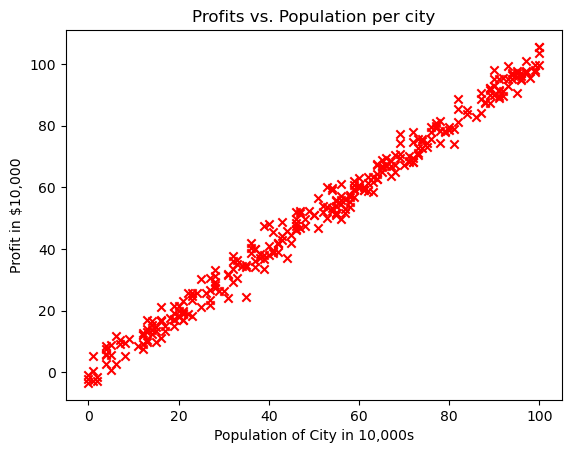

In [21]:
plt.scatter(x_train,y_train,marker='x',c='r')
plt.title("Profits vs. Population per city")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')
plt.show()

In [22]:
def compute_cost(x,y,w,b):
    m=x.shape[0]
    total_cost=0
    
#     code
    for i in range(m):
        total_cost=total_cost+(w*x[i]+b - y[i])**2
    total_cost=total_cost*(1/(2*m))
    return total_cost

In [35]:
# test
initial_w=2
initial_b=1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')

# !pip install public_tests
# from public_tests import *
# compute_cost_test(compute_cost)

<class 'numpy.float64'>
Cost at initial w: 1732.755


In [36]:
def compute_gradient(x,y,w,b):
    m=x.shape[0]
    dj_dw=0
    dj_db=0
    for i in range(m):
        dj_dw+=(w*x[i]+b -y[i])*x[i]
        dj_db+=(w*x[i]+b -y[i])
    dj_dw/=m
    dj_db/=m
    return dj_dw, dj_db

In [37]:
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)


Gradient at initial w, b (zeros): -3429.609178052974 -51.20505109827671


In [38]:
test_w=0.2
test_b=0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)
print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -2738.5558447196386 -40.81771776494336


In [61]:
def gradient_descent(x,y,w_in,b_in,cost_function,gradient_function,alpha,num_iters):
    m= len(x)
    j_history=[]
    w_history=[]
    w=copy.deepcopy(w_in)
    b= b_in
    
    for i in range(num_iters):
        dj_dw,dj_db = gradient_function(x,y,w,b)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        
        if i<100000:
            cost = cost_function(x,y,w,b)
            j_history.append(cost)
            
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(j_history[-1]):8.2f} ")
        
    return w,b,j_history,w_history

In [62]:
initial_w=0
initial_b=0

iterations = 1500
alpha=0.0001

w,b,_,_=gradient_descent(x_train,y_train,initial_w,initial_b,compute_cost,compute_gradient,alpha,iterations)
print('w,b found by gradient descent:',w,b)

Iteration    0: Cost   755.96 
Iteration  150: Cost     4.61 
Iteration  300: Cost     4.61 
Iteration  450: Cost     4.61 
Iteration  600: Cost     4.61 
Iteration  750: Cost     4.61 
Iteration  900: Cost     4.61 
Iteration 1050: Cost     4.61 
Iteration 1200: Cost     4.61 
Iteration 1350: Cost     4.61 
w,b found by gradient descent: 1.00744966465815 -0.0016407897635093945


In [64]:
m=x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w* x_train[i]+b

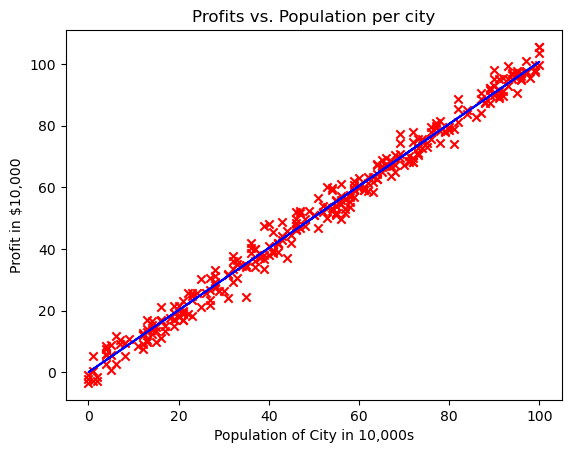

In [65]:
plt.plot(x_train, predicted, c = "b")
plt.scatter(x_train, y_train, marker='x', c='r') 
plt.title("Profits vs. Population per city")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')
plt.show()

In [66]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $35244.33
For population = 70,000, we predict a profit of $70505.07
